# Liczby pierwsze

# Liczby pierwsze

[http://doc.sagemath.org/pdf/en/thematic_tutorials/thematic_tutorials.pdf ]

Niech $N \in \mathbb{N}$  


$$ N=2^{e_2}3^{e_3}5^{e_5} \dots p_i^{e_i} \dots$$
 
(tylko skończona liczba wykładników $e_i$ jest różna od zera)

Rozkład można zapisać w postaci słownika:

Na przykład   504  -> {2:3, 3:2, 7:1}.

In [227]:
2^3*3^2*7

504

Metoda `factor` zwraca rozklad liczby naturalnej na iloczyn potęg liczb pierwszych (Metoda factor jest dostępna dla wielu typów danych w SageMath)

In [228]:
factor(504)

2^3 * 3^2 * 7

In [229]:
type(factor(504))

<class 'sage.structure.factorization_integer.IntegerFactorization'>

In [230]:
factor(504)[0]

(2, 3)

In [231]:
factor(504)[1]

(3, 2)

In [232]:
factor(504)[2]

(7, 1)

In [233]:
list(factor(504))

[(2, 3), (3, 2), (7, 1)]

In [234]:
len(list(factor(504)))

3

In [235]:
rozklad = factor(504)

liczba = 1

for i in range(len(list(rozklad))):
    liczba *= rozklad[i][0]^rozklad[i][1]

liczba

504

 ```is_prime``` ```next_prime``` ```prime_range``` ```primes``` (iterator) ```random_prime```

In [236]:
is_prime(17)

True

In [237]:
is_prime(18)

False

In [238]:
next_prime(5)

7

In [239]:
next_prime(6)

7

In [240]:
prime_range(3,23)

[3, 5, 7, 11, 13, 17, 19]

In [241]:
prime_range(4,24)

[5, 7, 11, 13, 17, 19, 23]

In [242]:
primes(5,10)

<generator object primes at 0x7ff320a3aa50>

In [243]:
random_prime(200)

61

In [244]:
random_prime(200, lbound=150)

193

# Problem:

## Wyzanczanie rozkładu liczby naturalnej na iloczyn potęg liczb pierwszych.

### Funkcja które generuje rozkład liczby naturalnej $n$ na iloczyn potęg liczb pierwszych

### Zaczynamy od funkcji, która zwraca najmniejszy dzielnik będący liczbą pierwszą

In [245]:
var('m')

def smallest_factor(m):
    '''
    Zwraca najmniejszą liczbę pierwszą z rozkładu liczby naturalnej m.
    '''
    if m < 2:
        return None 
    
    test_factor = 2 #kondydat na dzielnika m
    max_factor = sqrt(m) #jeżeli m jest liczbą złożoną to musi mieć dzielnik 
                         #będący l. pierwszą miniejszy lub równy od sqrt(m)
    
    while test_factor <= max_factor:
        print('Sprawdzamy dzilenik d=%s' %test_factor)
        if m%test_factor == 0:
            return test_factor
        test_factor = test_factor + 1  #w kolejnych etapach test_factor nie
                                        #musi być liczbą pierwszą!
        
    return m  #wartość zwracana gdy m jest l. pierwszą
        

In [246]:
smallest_factor(10)

Sprawdzamy dzilenik d=2


2

In [247]:
p=next_prime(10^3)
p

1009

In [248]:
smallest_factor(p)

Sprawdzamy dzilenik d=2
Sprawdzamy dzilenik d=3
Sprawdzamy dzilenik d=4
Sprawdzamy dzilenik d=5
Sprawdzamy dzilenik d=6
Sprawdzamy dzilenik d=7
Sprawdzamy dzilenik d=8
Sprawdzamy dzilenik d=9
Sprawdzamy dzilenik d=10
Sprawdzamy dzilenik d=11
Sprawdzamy dzilenik d=12
Sprawdzamy dzilenik d=13
Sprawdzamy dzilenik d=14
Sprawdzamy dzilenik d=15
Sprawdzamy dzilenik d=16
Sprawdzamy dzilenik d=17
Sprawdzamy dzilenik d=18
Sprawdzamy dzilenik d=19
Sprawdzamy dzilenik d=20
Sprawdzamy dzilenik d=21
Sprawdzamy dzilenik d=22
Sprawdzamy dzilenik d=23
Sprawdzamy dzilenik d=24
Sprawdzamy dzilenik d=25
Sprawdzamy dzilenik d=26
Sprawdzamy dzilenik d=27
Sprawdzamy dzilenik d=28
Sprawdzamy dzilenik d=29
Sprawdzamy dzilenik d=30
Sprawdzamy dzilenik d=31


1009

In [249]:
sqrt(p).n()

31.7647603485372

In [250]:
smallest_factor(40)

Sprawdzamy dzilenik d=2


2

In [251]:
l=11^2*17^2*23^2
smallest_factor(l)

Sprawdzamy dzilenik d=2
Sprawdzamy dzilenik d=3
Sprawdzamy dzilenik d=4
Sprawdzamy dzilenik d=5
Sprawdzamy dzilenik d=6
Sprawdzamy dzilenik d=7
Sprawdzamy dzilenik d=8
Sprawdzamy dzilenik d=9
Sprawdzamy dzilenik d=10
Sprawdzamy dzilenik d=11


11

#### Poprawiamy efektywność dziłania funkcji `smallest_factor`

#### Sprawdzamy czy jeżeli ograniczmy zmienność wratości parametru `test_factor` do liczb pierwszych, to funkcja będzie działać znacząco szybciej?

In [252]:
var('m')

def smallest_factor(m, szczegoly=False):
    '''
    Zwraca najmniejszą liczbę pierwszą z rozkładu liczby naturalnej m.
    '''
    if m < 2:
        return None 
    
    test_factor = 2 #kondydat na dzielnika m
    max_factor = sqrt(m) #jeżeli m jest liczbą złożoną to musi mieć dzielnik 
                         #będący l. pierwszą miniejszy lub równy od sqrt(m)
    
    while test_factor <= max_factor:
        if szczegoly :
            print('Sprawdzamy dzilenik d=%s' %test_factor)
            
        
        if m%test_factor == 0:
            return test_factor
        test_factor = test_factor + 1  #w kolejnych etapach test_factor nie
                                        #musi być liczbą pierwszą!
        
    return m  #wartość zwracana gdy m jest l. pierwszą
        

In [253]:
smallest_factor(259)

7

In [254]:
smallest_factor(259,szczegoly=True)

Sprawdzamy dzilenik d=2
Sprawdzamy dzilenik d=3
Sprawdzamy dzilenik d=4
Sprawdzamy dzilenik d=5
Sprawdzamy dzilenik d=6
Sprawdzamy dzilenik d=7


7

In [255]:
var('m')

def smallest_factor_np(m, szczegoly=False):
    '''
    Zwraca najmniejszą liczbę pierwszą z rozkładu liczby naturalnej m.
    Funkcja sprawdza podzieność przez liczby pierwsze wykorzystując metodę next_prime
    '''
    if m < 2:
        return None 
    
    test_factor = 2 #kondydat na dzielnika m
    max_factor = sqrt(m) #jeżeli m jest liczbą złożoną to musi mieć dzielnik 
                         #będący l. pierwszą miniejszy lub równy od sqrt(m)
    
    while test_factor <= max_factor:
        if szczegoly :
            print('Sprawdzamy dzilenik d=%s' %test_factor)
            
        
        if m%test_factor == 0:
            return test_factor
        test_factor = next_prime(test_factor) #w kolejnych etapach test_factor jest
                                        # liczbą pierwszą!
        
    return m  #wartość zwracana gdy m jest l. pierwszą

In [256]:
smallest_factor_np(267897)

3

In [257]:
var('m')

def smallest_factor_pi(m, szczegoly=False):
    '''
    Zwraca najmniejszą liczbę pierwszą z rozkładu liczby naturalnej m.
    Funkcja sprawdza podzieność przez liczby pierwsze wykorzystując iterator primes
    '''
    if m < 2:
        return None 
     
    for test_factor in primes(2,int(sqrt(m))+1): 
        if szczegoly:
             print('Sprawdzamy dzilenik d=%s' %test_factor)
                
        if m%test_factor == 0:
            return test_factor
    
    return m  #wartość zwracana gdy m jest l. pierwszą

In [258]:
smallest_factor_pi(267895)

5

In [259]:
smallest_factor_pi(267895, szczegoly=True)

Sprawdzamy dzilenik d=2
Sprawdzamy dzilenik d=3
Sprawdzamy dzilenik d=5


5

In [260]:
var('m')

def smallest_factor_pr(m, szczegoly=False):
    '''
    Zwraca najmniejszą liczbę pierwszą z rozkładu liczby naturalnej m.
    Funkcja sprawdza podzieność przez liczby pierwsze wykorzystując iterację 
    po liście prime_range(2, int(sqrt(m))+1)
    '''
    if m < 2:
        return None 
     
    for test_factor in prime_range(2,int(sqrt(m))+1): 
        if szczegoly:
             print('Sprawdzamy dzilenik d=%s' %test_factor)
                
        if m%test_factor == 0:
            return test_factor
    
    return m  #wartość zwracana gdy m jest l. pierwszą

In [261]:
smallest_factor_pr(267895, szczegoly=True)

Sprawdzamy dzilenik d=2
Sprawdzamy dzilenik d=3
Sprawdzamy dzilenik d=5


5

In [262]:
smallest_factor_pr(267895)

5

In [263]:
var('m')

def smallest_factor_ip(m, szczegoly=False):
    '''
    Zwraca najmniejszą liczbę pierwszą z rozkładu liczby naturalnej m.
    Testujemy tylko dzielniki będące l. pierwszymi wykorzystując test is_prime()
    '''
    if m < 2:
        return None 
    
    test_factor = 2 #kondydat na dzielnika m
    max_factor = sqrt(m) #jeżeli m jest liczbą złożoną to musi mieć dzielnik 
                         #będący l. pierwszą miniejszy lub równy od sqrt(m)
    
    while test_factor <= max_factor:
        if szczegoly :
            print('Sprawdzamy dzilenik d=%s' %test_factor)
            
        
        if m%test_factor == 0:
            return test_factor
        test_factor += 1
        while not is_prime(test_factor):
            test_factor += 1
            
        
    return m  #wartość zwracana gdy m jest l. pierwszą
        

In [264]:
smallest_factor_ip(267895)

5

In [265]:
smallest_factor_ip(267895,szczegoly=True)

Sprawdzamy dzilenik d=2
Sprawdzamy dzilenik d=3
Sprawdzamy dzilenik d=5


5

Generujemy liczbę całkowitą l 

Dodaj dodatkowy (opcjonalny) argument, który pozwoli na wypisywanie wyników pośrednich

## Badamy czas działania tych funkcji

Generujemy dużą liczbę całkowitą

In [266]:
l1 = randint(10,100)
l2 = l1 + randint(10,100)
ogr_dolne = randint(10^l1,10^l2)
ogr_gorne = randint(ogr_dolne + 10^l1,ogr_dolne + 10^l2)
p1=random_prime(ogr_gorne, lbound = ogr_dolne)
p2=p1
while p2==p1:
    p2=next_prime(p1+2^l1)
z=[p1,p2]
p3=p2
while p3 in z:
    p3  = next_prime(2*p2+2^l1)
k1=randint(3,9)
k2=randint(3,9)
k3=randint(3,9)
l = p1^k1*p2^k2*p3^k3
print('''l = %s  \n
         p1 = %d , \n
         p2 = %d , \n
         k1 = %d , k2 = %d , liczba bitów = %d \n''' %(l,p1,p2,k1,k2,l.nbits()))

l = 758724685012516288144030454336405165802478102660320048875636876177111071190835299585875383355663648588422455778894899574791123915800930480422815214407970084781168216871102809754889796697002719530484045296591836038530728321574144559239473688488423680343199705173294661392336874685429872530500437836304452328103954992402751624691912539254425705198803488246530330117160100777396472497916727006819990749929820907584590731917171164110899175085898592235501264885653071721638435400736016654993312051388316626700468643901783002403335907297677541514569341089405209884470453523249407290396513235997389745089048253693353698135402620374246969244749848433058027939792155474875752973331273053044439592444428408584344980151332012617582257995222435704269583226004279438768818022812387354900111677632623556710972817547571669530730106787356212323108164107162127518709768577009678797628469940694070613720555003964561685481780322274392367967470261272363894349995389653529133606616042704049332097791398560283414350695

Badanie czasu działania:
funkcja `timeit` lub metody magiczne `%time` `%prun`
Testujemy czas działania zdefiniowanych wcześniej funkcji

In [267]:
next_prime(100)

101

In [268]:
l = 23^4*59^4*101^(10)
print(l, l.nbits())

374570118570966579861307294470601 109


In [269]:
print(timeit('smallest_factor(l)'))
print(timeit('smallest_factor_np(l)'))
print(timeit('smallest_factor_pi(l)'))
print(timeit('smallest_factor_ip(l)'))

625 loops, best of 3: 8.71 μs per loop
625 loops, best of 3: 5.93 μs per loop
625 loops, best of 3: 12.8 μs per loop
625 loops, best of 3: 5.72 μs per loop


**Uwaga: w przypadku funkcji `smallest_factor_pr` do iteracji jest wykorzystana lista, która może być bardzo długa co znacząco utrudnia działanie funkcji!**

In [270]:
l = 59^2*101^6
l.nbits()

52

In [271]:
print(timeit('smallest_factor_pr(l)'))

5 loops, best of 3: 358 ms per loop


In [272]:
%prun smallest_factor_pr(l)

### Uwaga: trudność wskazania rozkładu liczby całkowitej na iloczyn potęg liczb pierwszych zależy od rzędu wielkości liczby całkowitej i ogólnie im większy jest rząd wielkości liczby tym więcej czasu jest potrzbne na wskazanie rozkładu, ale wśród liczb ustalonego rzędu są liczby, które rokłada się bardzo szybko i takie, które rozkłada się bardzo trudno!

### Sprawdzamy czas działania dla liczb k-bitowych (musimy wygenerować liczby całkowite o k bitach)

```randint()``` ```nbits()```

### Jak można wygenerować liczbę całkowitą o k - bitach?

In [273]:
k=128
print((2^(k)).nbits())
print((2^(k-1)).nbits())
print((2^(k)-1).nbits())
print((2^(k-1)-1).nbits())

129
128
128
127


## Napisz generator k-bitowych liczb naturalnych

#### Generujemy liczby naturalne k-bitowe

#### Poszukaj liczb nie wiekszego rzędu niż 1000 bitów dla których wskazanie podzielnika pierwzego będzie bardzo trudne.

In [274]:
bity = 6
p1=random_prime(2^bity-1, lbound=2^(bity-1))
p2=next_prime(p1)
l=p1*p2
print(l)
print(l.nbits())

3599
12


In [275]:
print(timeit('smallest_factor(l)'))
print(timeit('smallest_factor_np(l)'))
print(timeit('smallest_factor_pi(l)'))
print(timeit('smallest_factor_ip(l)'))

5 loops, best of 3: 49.4 ms per loop
25 loops, best of 3: 13.5 ms per loop
625 loops, best of 3: 105 μs per loop
25 loops, best of 3: 13.2 ms per loop


In [276]:
%time smallest_factor(l)
%time smallest_factor_np(l)
%time smallest_factor_pi(l)
%time smallest_factor_ip(l)

CPU times: user 50.3 ms, sys: 0 ns, total: 50.3 ms
Wall time: 50.3 ms
CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 12.4 ms
CPU times: user 176 µs, sys: 3 µs, total: 179 µs
Wall time: 182 µs
CPU times: user 13.5 ms, sys: 0 ns, total: 13.5 ms
Wall time: 13.4 ms


59

In [277]:
bity = 16
p1=random_prime(2^bity-1, lbound=2^(bity-1))
p2=next_prime(p1)
l=p1*p2
print(l)
print(l.nbits())

1959390221
31


In [278]:
%time smallest_factor(l)
%time smallest_factor_np(l)
%time smallest_factor_pi(l)
%time smallest_factor_ip(l)

CPU times: user 51.3 s, sys: 0 ns, total: 51.3 s
Wall time: 51.3 s
CPU times: user 5.65 s, sys: 0 ns, total: 5.65 s
Wall time: 5.65 s
CPU times: user 6.65 ms, sys: 0 ns, total: 6.65 ms
Wall time: 6.61 ms
CPU times: user 5.44 s, sys: 7.77 ms, total: 5.44 s
Wall time: 5.45 s


44263

In [279]:
bity = 18
p1=random_prime(2^bity-1, lbound=2^(bity-1))
p2=next_prime(p1)
l=p1*p2
print(l)
print(l.nbits())

18308796019
35


In [280]:
%time smallest_factor_pi(l)

CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 11.6 ms


135301

In [281]:
bity = 24
p1=random_prime(2^bity-1, lbound=2^(bity-1))
p2=next_prime(p1)
l=p1*p2
print(l)
print(l.nbits())

198699894248881
48


In [282]:
%time smallest_factor_pi(l)

CPU times: user 1.43 s, sys: 0 ns, total: 1.43 s
Wall time: 1.43 s


14096083

In [283]:
bity = 28
p1=random_prime(2^bity-1, lbound=2^(bity-1))
p2=next_prime(p1)
l=p1*p2
print(l)
print(l.nbits())

29873518340501467
55


In [284]:
%time smallest_factor_pi(l)

CPU times: user 17.5 s, sys: 0 ns, total: 17.5 s
Wall time: 17.5 s


172839571

In [285]:
bity = 1000
p1=random_prime(2^bity-1, lbound=2^(bity-1))
p2=next_prime(p1)
l=p1*p2
print(l)
print(l.nbits())

39484978525018406908049205788548906556537100860394292303304046868263061327795617907007017444214405172906043696826120048087341511143850806567210099231044607764488323401477828438745691736749274728729770768765763757662938154655383380050155693811537513150585326592586963216772622769833052320566034496504335260149934949848212980134359219328212584896111596147845628079505236770699547565822584395195364398485958645307931614452362243771748803505377959403333955356946994897561944763977090834498123138418556657392576793176740906146253831957693643681295938138890076589468095007447888172345957685921181696127926211
1999


In [286]:
s = 2*l
print(s.nbits())

2000


In [287]:
%time smallest_factor_ip(s)

CPU times: user 20.7 ms, sys: 7 µs, total: 20.7 ms
Wall time: 20.5 ms


2

In [288]:
%time smallest_factor_ip(s)
%time smallest_factor_pi(s)
%time smallest_factor_ip(s)

CPU times: user 24.8 ms, sys: 11 µs, total: 24.8 ms
Wall time: 26 ms
CPU times: user 647 µs, sys: 9 µs, total: 656 µs
Wall time: 674 µs
CPU times: user 19.5 ms, sys: 0 ns, total: 19.5 ms
Wall time: 19.5 ms


2

# Funkcja która zwraca rozkład liczby naturalnej m na iloczyn potęg liczb pierwszych

In [289]:
n?

In [290]:
var('m')

def rozklad(m):
    '''
    Zwraca rozkład dodatniej liczby całkowitej m,
    na iloczyn potęg liczb pierwszych w postaci słownika.
    '''
    current_number = m 
    decomp = {} #incjacja słownika w którym zapiszemy rozkład
    while current_number > 1:
        p = smallest_factor_pi(current_number, szczegoly=False) 
        if p in decomp.keys():  
            decomp[p] = decomp[p] + 1 
        else:  # 
            decomp[p] = 1  
        current_number = current_number // p # // iloraz 
    return decomp

In [291]:
k = 27577630
rozklad(k)

{2: 1, 5: 1, 241: 1, 11443: 1}

In [292]:
rozklad?

In [293]:
rozklad(100)

{2: 2, 5: 2}

In [294]:
N=2^18*3^9*17^4*17^11*23^9
N

26602077800288519462755926749894304595968

In [295]:
rozklad(N) 

{2: 18, 3: 9, 17: 15, 23: 9}

In [296]:
N=11^23*13^25
N

6318522936120886809589066121991354248950631083254983

In [297]:
rozklad(N) 

{11: 23, 13: 25}

Funkcja `de_rozklad` zwraca na podstawie słownika liczbę całkowitą, której rozkład na iloczyn potęg liczb pierwszych jest zapisany w tym słowniku

In [298]:
def de_rozklad(D):
    '''
    Na podstawie słownika przedstawiającego rozkład N zwraca liczbę N
    '''
    N = 1
    for p in D.keys():  
        N = N * (p ** D[p])  
    return N

In [299]:
D = rozklad(N)
D

{11: 23, 13: 25}

In [300]:
de_rozklad(D)

6318522936120886809589066121991354248950631083254983

In [301]:
N == de_rozklad(D)

True

# Generowanie liczb pierwszych

In [302]:
def sito(n):  
    
    primes = []
    for possiblePrime in range(2, n + 1):
         
        isPrime = True
        for num in range(2, int(possiblePrime ** 0.5) + 1):
            if possiblePrime % num == 0:
                isPrime = False
                break
        if isPrime:
            primes.append(possiblePrime)
    
    return(primes)

In [303]:
print(sito(500))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499]


In [304]:
print(sito(50000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

# Zadanie


## Spirala Ulama

Spirala Ulama, to metoda wizualizacji ciągów na płaszczyźnie, która polega na zanaczeniu w punkcie (0,0) pierwszego wyrazu a następnie pozostałych wyrazów na spirali dodatnio skierowanej. Wartość wyrazu ciągu to odległośc od poprzedzającego wyrazu ciągu na spirali. Dla uproszczenia gdy będziemy rozważać ciągi o wyrazach naturalnych będziemy przyjmowac odległośc liniową.


## Wykonaj ilustrację rozmieszczenia liczb pierwszych na odcinku oraz na spirali Ulama

Ponieważ wykresy będą dyskretne, więc możemy wykorzystywać punkty i łamane (podstawowe obiekty graficzne)


 ```line()``` ```point()```
 
 



In [305]:
var('t')


def spirala_u_1(t):
    '''Wszytkie liczby naturalne'''
    
    punkty = [(0,0)] 
    
    punkt = (0,0)
    
    azymut = 1 # 1 w prawo lub w górę, - 1 w lewo lub w dół
    
    for l in range(1,t):
        for i in range(1, l+1):
            punkty.append((punkt[0]+azymut*i, punkt[1]))
            punkty.append((punkt[0]+azymut*l, punkt[1]+azymut*i))
        punkt = punkty[-1]
        azymut *= -1
        
    
    #wykres
    print(len(punkty))
    wykres = Graphics()
    
    for x in punkty:
        wykres += point(x, color='red', axes=False)
        
    show(wykres)

2451


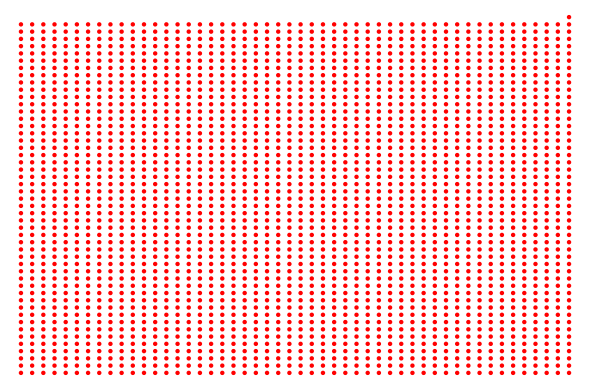

In [306]:
spirala_u_1(50)

57


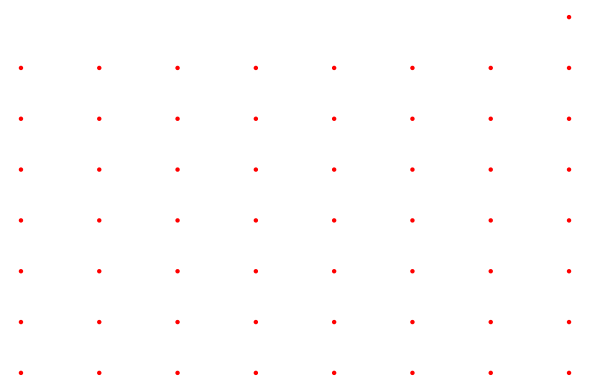

In [307]:
spirala_u_1(8)

In [308]:
var('t')


def spirala_u_lp(t):
    
    punkty = [(0,0)] 
    
    punkt = (0,0)
    
    azymut = 1 # 1 w prawo lub w górę, - 1 w lewo lub w dół
    
    for l in range(1,t):
        for i in range(1, l+1):
            punkty.append((punkt[0]+azymut*i, punkt[1]))
            punkty.append((punkt[0]+azymut*l, punkt[1]+azymut*i))
        punkt = punkty[-1]
        azymut *= -1
        
    
    #wykres
    
    wykres = Graphics()
    
    
    for i in range(1,len(punkty)):
        if is_prime(i):
            wykres += point(punkty[i], color='red', axes=False)
        
    show(wykres)

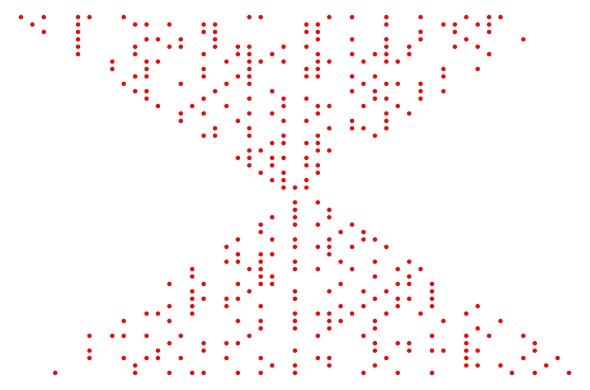

In [309]:
spirala_u_lp(50)

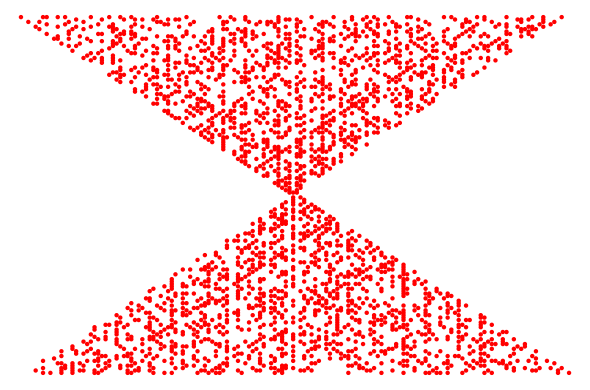

In [310]:
spirala_u_lp(150)

# Zadanie: Poprawić definicję funkcji `spirala_u_lp` tak aby generowała tylko liczby naturalne mniejsze od podanego argumentu!

In [311]:
var('t')


def spirala_u_lp_1(t):
        
    punkty = [(0,0)] 
 

    etap = 0 #wartości modulo 4: 0 w prawo, 1 do góry 2 w lewo 3 w dół
    d = 2
    
    for l in range(1,t):
        if etap == 0:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0]+1, punkt[1])) 
                if len(punkty) > t-1:
                    break
            
        elif etap == 1:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0], punkt[1]+1))
                if len(punkty) > t-1:
                    break
                
        elif etap == 2:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0]-1, punkt[1]))
                if len(punkty) > t-1:
                    break
                
        else:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0], punkt[1]-1))
                if len(punkty) > t-1:
                    break
    
        
        
            
        etap +=1
        etap = etap%4

        if l%2 == 0:
            d += 1
            
    
    #wykres
    wykres = Graphics()
      
    for i in range(len(punkty)):
        if is_prime(i):
            wykres += point(punkty[i], color='red', axes=False)
        
    show(wykres)
    #return(punkty)

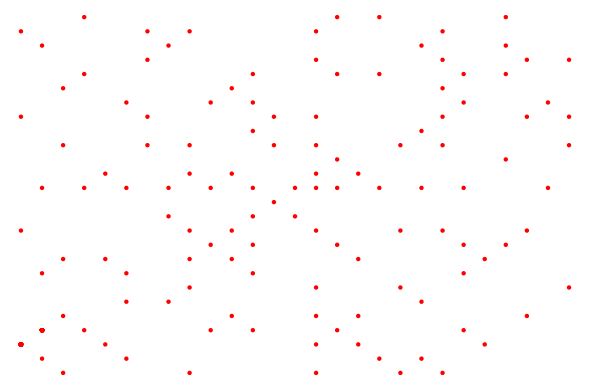

In [312]:
spirala_u_lp_1(700)

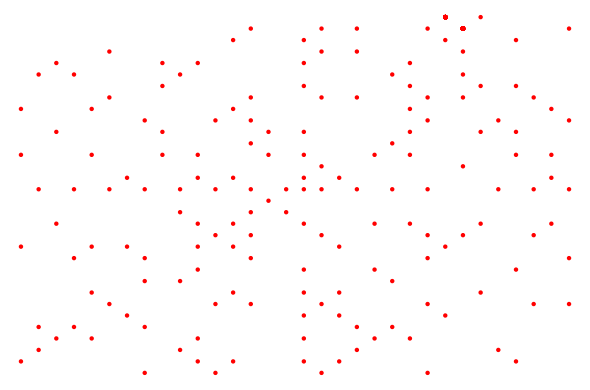

In [313]:
spirala_u_lp_1(1000)

# Zadanie: Uzupełnij fukcję `ulam_lp` o możliwość generowania animacji

In [314]:
var('t')


def spirala_u_lp_animacja(t):
        
    punkty = [(0,0)] 
 

    etap = 0 #wartości modulo 4: 0 w prawo, 1 do góry 2 w lewo 3 w dół
    d = 2
    
    for l in range(1,t):
        if etap == 0:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0]+1, punkt[1])) 
                if len(punkty) > t-1:
                    break
            
        elif etap == 1:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0], punkt[1]+1))
                if len(punkty) > t-1:
                    break
                
        elif etap == 2:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0]-1, punkt[1]))
                if len(punkty) > t-1:
                    break
                
        else:
            for i in range(1,d):
                punkt = punkty[-1]
                punkty.append((punkt[0], punkt[1]-1))
                if len(punkty) > t-1:
                    break
    
        
        
            
        etap +=1
        etap = etap%4

        if l%2 == 0:
            d += 1
            
    
    #wykres

    
    wykres = plot(1, -l/2, l/2, color='white', ymin = -l/2, ymax = l/2, figsize=[int(l/2),int(l/2)])
    klatki = []
    
    for i in range(1,t):
        if is_prime(i):
            wykres += point(punkty[i], color='red', axes=False)
            klatki.append(wykres)
        
    return klatki

In [315]:
plot?

In [316]:
a = spirala_u_lp_animacja(30)

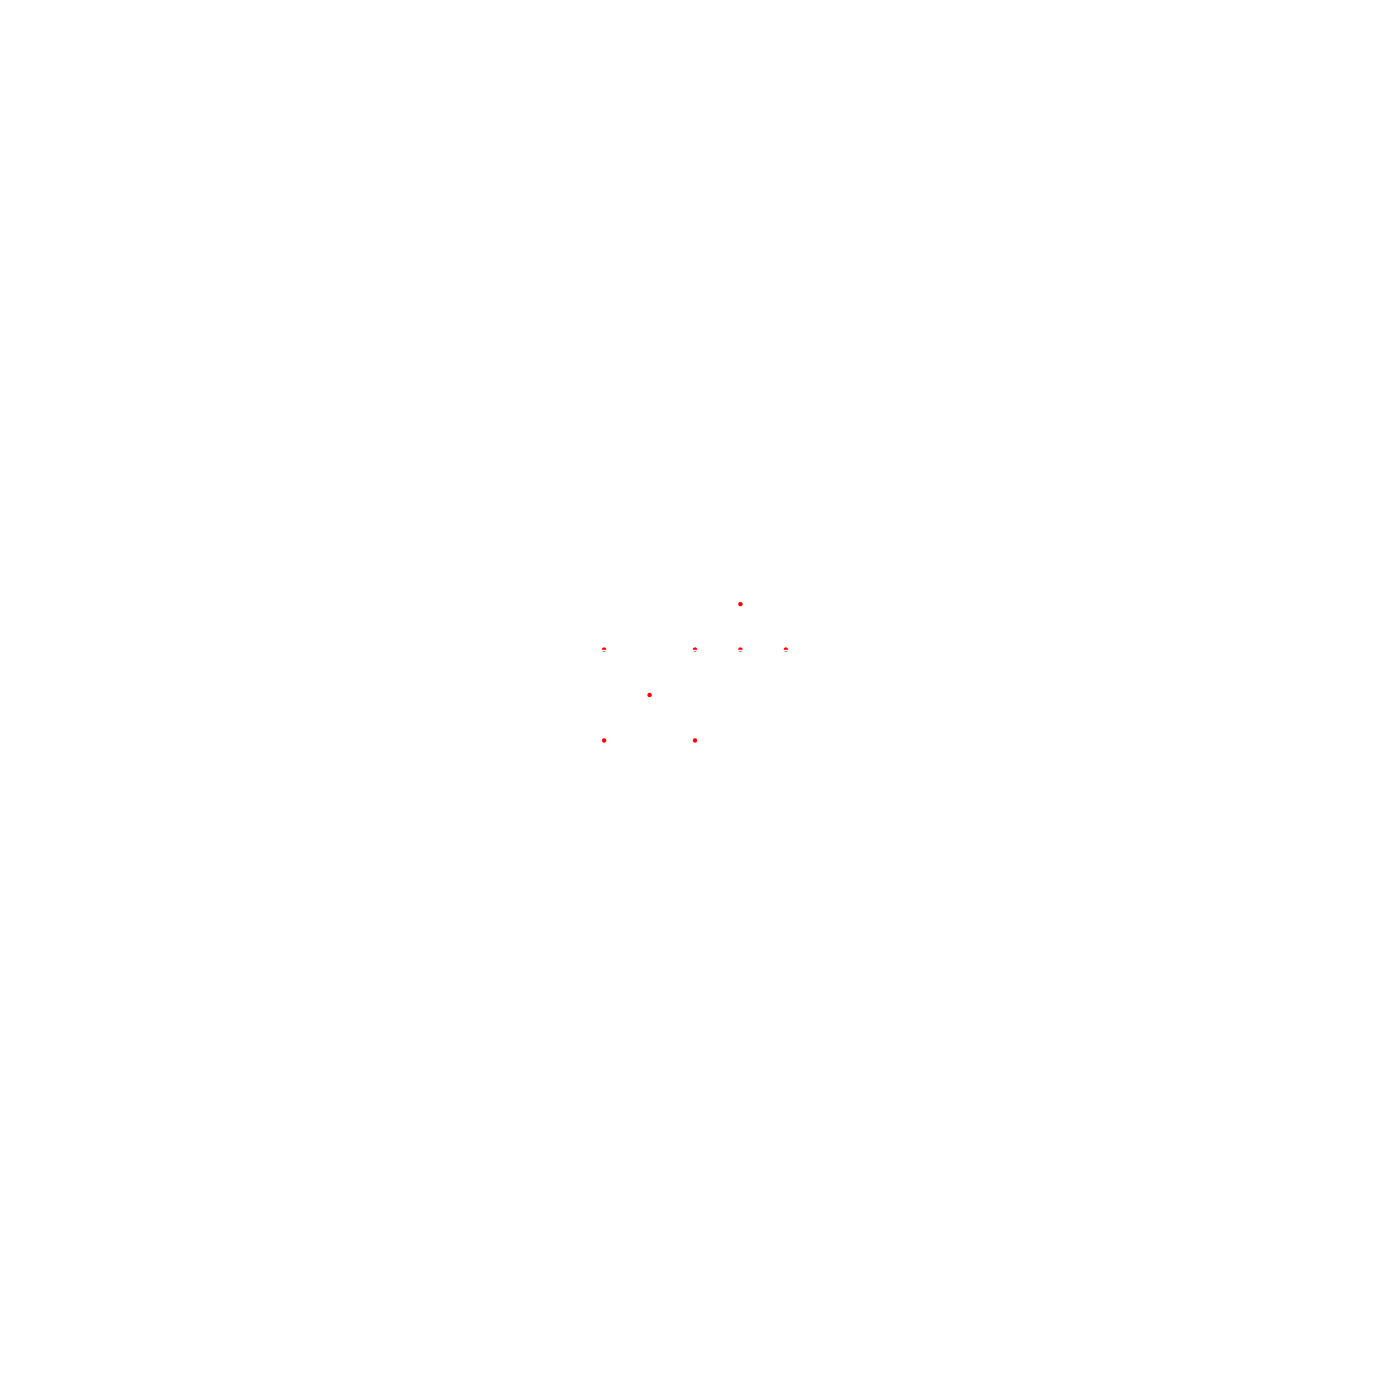

In [317]:
a[7]

In [318]:
animate(a)

Animation with 10 frames

Animacja wygląda źle ponieważ na każdej klatce filmu jest inna skala (inna długość jednostki na osiach)! 

In [319]:
a = spirala_u_lp_animacja(1000)

In [320]:
animate(a)

Animation with 168 frames

### Odległość dwóch kolejnych liczb pierwszych

In [321]:
def prime_gap(m):  
    
    gap =[] 
    
    list_p = sito_2(m)
    for i in range(1,len(list_p)):
        gap.append(list_p[i]-list_p[i-1])
    
    return(gap)
        

In [322]:
# lista_gap = prime_gap(10000)

In [323]:
# print(lista_gap)

In [324]:
# lista_gap.sort()

In [325]:
# print(lista_gap)

# Zadanie:

### Zdefiniować funkcję prime_gap_2() która zwraca odległości kolejnych liczb pierwszych mniejszych lub równych od n oraz pary liczb pierwszych którę są tej odległości np. 1: [(2,3)]


# Zadanie:

### Zdefiniować funkcję prime_gap_3() która zwraca uporządkowaną listę liczb, które mogą być odległościami kolejnych liczb pierwszych mniejszych lub równych od n i funkcję max_prime_gap() która zwrca maksymalną odległość kolejnych liczb pierwszych mniejszych lub równych od n

# Zadanie:

### Zdefiniować funkcję prime_gap_4() która będzie generowała ciekawą ilustrację graficzną dla odległości kolejnych liczb pierwszych

## Problem

### Czy dla dowolnego $k \in \mathbb{N}$ istnieją dwie kolejne liczby pierwsze $p_i$ $p_{i+1},$ których odległość jest większa od $k$?

#### Badamy odległości liczb pierwszych mniejszych lub równych $10^6$

Wykorzystujemy funkcję prime_gap_2(), która dla danej liczby naturalnej $N$ zwraca uporządkowaną listę liczb $d_i$, które są odległościami kolejnych liczb naturalnych mniejszych lub równych od $N$ oraz liczbę liczb pierwszych o odgłości $d_i$

## Można wykazać, że dla dowolnego $k \in \mathbb{N}$ istnieją dwie kolejne liczby pierwsze $p_i$ oraz $p_{i+1}$ o odległości większej lub równej $k$

Rozważmy $k$ kolejnych liczb naturalnych:


$$ (k+2)! +2 , \ (k+2)! +3, \ (k+2)! + 4, \dots , (k+2)! +k+2 $$

każda z $k$  kolejnych liczb naturalnych od 2 do $k+2$ występuje w iloczynie definiującym $(k+2)!$ Stąd $i$-ta liczba ($(k+2)! + i$) na tej liście jest podzielna przez $i$ więc nie jest liczbą pierwszą


Dla $ i \in \{ 2\,, \dots \,, k+2 \}$

$$ i \vert ((k+2)! +i ) \quad (k+2)! +i = i\cdot(\Pi_{j=2}^{i-1} j \cdot \Pi_{j=i+1}^{k+2} j  + 1) $$ 



### Napisz funkcję ``` generuj_pierwsze(n, k)```, która dla podanego $k$ generuje dwie kolejne liczby pierwsze o odległości większej lub równej $k$ mniejsze lub równe od $n$ (o ile istnieją)

In [326]:
var('m,k')
    
def generuj_pierwsze(m, k):
    gap =[]
  
    list_p = sito_2(m)
    for i in range(1,len(list_p)):
        odleglosc = list_p[i]-list_p[i-1]
        if odleglosc >= k:
            gap.append(list_p[i])
    return(gap)

In [327]:
l=10000
k=34
print(generuj_pierwsze(l, k))

NameError: name 'sito_2' is not defined

In [ ]:
l=10000
k=36
print(generuj_pierwsze(l, k))

In [ ]:
l=10000
k=66
print(generuj_pierwsze(l, k))

In [ ]:
def primes_dist(k): 
    '''Funkcja zwraca liczby o odległości większej lub równej k'''
    p1 = previous_prime((k+2).factorial()+2)
    p2 = next_prime((k+2).factorial()+k+2)
    print(p1)
    print(p2)
    print(p2-p1)

In [ ]:
primes_dist(4)

# Zadanie

###  Zmodyfikować funkcję primes_dist(n) tak aby przedstawiała ilustrację graficzną zmian odległości kolejnych liczb pierwszych

Można wykorzystać funkcję list_plot

# Zadanie

### Zmodyfikować funkcję sito_2(n) tak aby przedstawiała ciekawą ilustrację graficzną działania algorytmu generowania liczb pierwszych